In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import datetime as dt

%matplotlib inline


In [2]:
# Define a working directory
os.chdir('/Users/relic/Documents/mirror-data')

In [3]:
# Import the dataset
df = pd.read_csv('gray_tracking_deidentified.csv', skiprows=2)
#df = df[1:] #take the data less the header row
new_header = ['Date', 'DayOfWeek', 'PositiveRetro', 'NegativeRetro', 'DailyGoals', 'Journal', 
              'Alcohol', 'WhyDrink', 'BreakfastHealth', 'WalkRunDistance', 'LunchHealth', 'RoomClean', 
              'HoursSocial', 'HoursArt', 'DinnerHealth', 'SleepTime', 'WakeTime', 'HoursSleep', 
              'WhereSleep', 'PartnerContact',  'MinutesMusic', 'MorningQuality', 'FocusLevel', 
              'AnxietyLevel', 'HealthLevel', 'Motivationlevel', 'HappyLevel', 'Evening', 'Drugs', 
              'Weight', 'HoursTVGames', 'FinishBook', 'Illness', 'WorkStartTime', 'WorkEndTime', 
              'SecondCoffeeTime', 'CovidPoints', 'CovidPointsActivity']
df.columns = new_header

# Drop a few columns with sensitive data. Data previously removed manually so these columns should be enpty. 
df = df.drop(['PositiveRetro', 'NegativeRetro', 'DailyGoals', 'Journal', 'WhyDrink', 'Evening', 'CovidPointsActivity'], axis=1)
pd.set_option('display.max_columns', None)

# Fill the NaNs in some of the numeric columns with 0
zero_columns = ['CovidPoints', 'Illness']
for column in zero_columns:
    df[column].fillna(0, inplace = True)

# Fill a few specific rows in specific column with NaN
df['Weight'] = df['Weight'].replace(r'^\s*$', np.nan, regex=True)
df['CovidPoints'] = df['CovidPoints'].replace('?', 0)

# # Fill the NaNs in some of the numeric columns with the column average
# avg_columns = ['Alcohol', 'WalkRunDistance', 'HoursSocial', 'HoursArt', 'MinutesMusic', 'Weight', 'HoursTVGames']
# for column in avg_columns:
#     df[column] = df[column].fillna(df.mean())

df = df[:861]
df_clean = df


In [5]:
df.head(10)

,Date,DayOfWeek,Alcohol,BreakfastHealth,WalkRunDistance,LunchHealth,RoomClean,HoursSocial,HoursArt,DinnerHealth,SleepTime,WakeTime,HoursSleep,WhereSleep,PartnerContact,MinutesMusic,MorningQuality,FocusLevel,AnxietyLevel,HealthLevel,Motivationlevel,HappyLevel,Drugs,Weight,HoursTVGames,FinishBook,Illness,WorkStartTime,WorkEndTime,SecondCoffeeTime,CovidPoints
0,10/16/18,Tuesday,4.0,6.0,3.4,4.0,7.0,4.0,0.0,2.0,3:06,8:24,8:30:00,Home,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
1,10/17/18,Wednesday,3.0,5.0,0.0,7.0,6.0,6.0,0.0,5.0,0:40,4:54,8:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
2,10/18/18,Thursday,5.0,5.0,0.0,6.0,6.0,2.0,0.0,2.0,4:00,7:20,8:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
3,10/19/18,Friday,4.0,7.0,0.0,6.0,8.0,6.0,0.0,8.0,0:40,2:00,6:00:00,Home,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
4,10/20/18,Saturday,0.0,6.0,0.0,7.0,8.0,6.0,0.0,7.0,1:00,7:02,7:42:00,Traveling,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
5,10/21/18,Sunday,1.0,8.0,0.0,0.0,7.0,2.0,0.0,7.0,0:30,4:30,5:30:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
6,10/22/18,Monday,1.0,0.0,0.0,7.0,4.0,4.0,2.0,8.0,5:00,7:00,7:30:00,Home,0.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
7,10/23/18,Tuesday,2.0,0.0,0.0,2.0,4.0,3.0,0.5,4.0,3:00,1:00,6:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
8,10/24/18,Wednesday,3.0,3.0,0.0,0.0,4.0,6.0,0.0,5.0,0:00,3:00,6:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
9,10/25/18,Thursday,0.0,0.0,0.0,0.0,7.0,3.0,1.0,4.0,2:40,7:00,7:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              921 non-null    object 
 1   DayOfWeek         921 non-null    object 
 2   Alcohol           921 non-null    float64
 3   BreakfastHealth   844 non-null    float64
 4   WalkRunDistance   921 non-null    float64
 5   LunchHealth       809 non-null    float64
 6   RoomClean         838 non-null    float64
 7   HoursSocial       773 non-null    float64
 8   HoursArt          812 non-null    float64
 9   DinnerHealth      810 non-null    float64
 10  SleepTime         776 non-null    object 
 11  WakeTime          778 non-null    object 
 12  HoursSleep        862 non-null    object 
 13  WhereSleep        866 non-null    object 
 14  PartnerContact    865 non-null    float64
 15  MinutesMusic      811 non-null    float64
 16  MorningQuality    505 non-null    float64
 1

In [7]:
df.describe()

,Alcohol,BreakfastHealth,WalkRunDistance,LunchHealth,RoomClean,HoursSocial,HoursArt,DinnerHealth,PartnerContact,MinutesMusic,MorningQuality,FocusLevel,AnxietyLevel,HealthLevel,Motivationlevel,HappyLevel,Drugs,HoursTVGames,Illness
count,921.000000,844.000000,921.000000,809.000000,838.000000,773.000000,812.000000,810.000000,865.000000,811.000000,505.000000,744.000000,742.000000,543.000000,547.000000,743.000000,861.000000,728.000000,921.000000
mean,1.513029,6.234597,0.954908,5.384425,6.451074,7.583765,1.087451,5.602469,0.268208,31.288533,5.984158,5.763441,5.134771,5.257827,5.751371,6.095559,0.040650,1.293407,0.331162
std,1.449829,2.866245,1.779446,2.211425,1.745961,3.744277,1.916432,2.207414,0.492743,66.177170,1.955798,1.795900,1.698027,1.184077,1.841815,1.503014,0.225103,1.063870,0.940626
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,4.000000,6.000000,5.000000,0.000000,4.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,0.000000,0.500000,0.000000
50%,1.000000,7.000000,0.000000,5.000000,7.000000,8.000000,0.275000,6.000000,0.000000,15.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,0.000000,1.000000,0.000000
75%,2.000000,9.000000,1.400000,7.000000,8.000000,12.000000,1.500000,7.000000,0.000000,30.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,0.000000,2.000000,0.000000
max,6.000000,10.000000,13.100000,10.000000,9.000000,12.000000,12.000000,10.000000,2.000000,400.000000,10.000000,10.000000,10.000000,8.000000,10.000000,10.000000,2.000000,6.000000,7.000000


In [8]:
df.columns

Index(['Date', 'DayOfWeek', 'Alcohol', 'BreakfastHealth', 'WalkRunDistance',
       'LunchHealth', 'RoomClean', 'HoursSocial', 'HoursArt', 'DinnerHealth',
       'SleepTime', 'WakeTime', 'HoursSleep', 'WhereSleep', 'PartnerContact',
       'MinutesMusic', 'MorningQuality', 'FocusLevel', 'AnxietyLevel',
       'HealthLevel', 'Motivationlevel', 'HappyLevel', 'Drugs', 'Weight',
       'HoursTVGames', 'FinishBook', 'Illness', 'WorkStartTime', 'WorkEndTime',
       'SecondCoffeeTime', 'CovidPoints'],
      dtype='object')

In [9]:
df.shape

(921, 31)

In [10]:
# There shouldn't be any duplicates, but just in case: 
df = df.drop_duplicates(keep = 'first')
df.shape

(921, 31)

In [11]:
# What was the longest distance I hiked at any point this year? 
df_sort = df.sort_values(by = 'WalkRunDistance',  ascending=False)
df_sort.head(10)

,Date,DayOfWeek,Alcohol,BreakfastHealth,WalkRunDistance,LunchHealth,RoomClean,HoursSocial,HoursArt,DinnerHealth,SleepTime,WakeTime,HoursSleep,WhereSleep,PartnerContact,MinutesMusic,MorningQuality,FocusLevel,AnxietyLevel,HealthLevel,Motivationlevel,HappyLevel,Drugs,Weight,HoursTVGames,FinishBook,Illness,WorkStartTime,WorkEndTime,SecondCoffeeTime,CovidPoints
740,10/25/20,Sunday,2.0,5.0,13.1,7.0,6.0,12.00,0.0,8.0,2:00,9:30,7:30,Traveling,0.0,20.0,7.0,4.0,4.0,5.0,4.0,6.0,0.0,NaN,2.00,NaN,0.0,NaN,NaN,NaN,0
704,9/19/20,Saturday,2.0,9.0,12.7,9.0,4.0,0.00,2.0,7.0,21:30,7:24,10:24,Traveling,0.0,0.0,9.0,8.0,2.0,8.0,9.0,8.0,0.0,NaN,1.00,NaN,0.0,NaN,NaN,0,0
724,10/9/20,Friday,2.0,8.0,10.5,8.0,6.0,0.25,0.0,6.0,21:30,8:30,9:00,Traveling,0.0,20.0,10.0,7.0,2.0,7.0,8.0,5.0,0.0,NaN,0.50,NaN,0.0,NaN,NaN,0,?
758,11/12/20,Thursday,3.0,9.0,10.4,6.0,6.0,1.00,0.0,5.0,1:30,6:47,8:47,Traveling,0.0,0.0,5.0,8.0,6.0,7.0,8.0,7.0,0.0,NaN,1.00,NaN,0.0,NaN,NaN,0,210
723,10/8/20,Thursday,1.0,8.0,9.4,8.0,6.0,0.00,0.0,3.0,23:30,8:46,10:06,Traveling,0.0,20.0,10.0,6.0,3.0,6.0,7.0,4.0,0.0,NaN,0.25,"Felllowship of the Ring, JRR Tolkein",0.0,NaN,NaN,0,0
835,1/28/21,Thursday,4.0,4.0,8.9,8.0,8.0,2.00,0.0,3.0,4:30,8:20,8:35,Traveling,0.0,15.0,6.0,2.0,3.0,7.0,6.0,7.0,0.0,NaN,5.00,NaN,0.0,NaN,NaN,0,0
762,11/16/20,Monday,0.0,8.0,8.5,6.0,6.0,0.50,0.0,2.0,0:00,6:30,10:16,Traveling,0.0,30.0,10.0,5.0,4.0,6.0,5.0,7.0,0.0,NaN,0.00,NaN,0.0,NaN,NaN,0,0
564,5/2/20,Saturday,2.0,8.0,8.5,0.0,7.0,8.00,0.0,9.0,3:30,10:20,8:20,Home,0.0,30.0,4.0,6.0,7.0,6.0,4.0,NaN,0.0,NaN,2.00,NaN,0.0,NaN,NaN,21:00,NaN
721,10/6/20,Tuesday,2.0,8.0,7.5,7.0,6.0,1.00,1.0,3.0,0:00,9:30,8:30,Traveling,0.0,20.0,8.0,8.0,4.0,5.0,8.0,8.0,0.0,NaN,0.00,NaN,0.0,NaN,NaN,0,20
764,11/18/20,Wednesday,0.0,5.0,7.4,6.0,6.0,0.00,0.0,4.0,22:00,7:30,9:30,Traveling,0.0,30.0,10.0,7.0,2.0,7.0,6.0,8.0,0.0,NaN,0.50,NaN,0.0,NaN,NaN,0,0


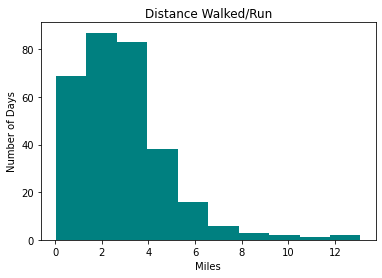

In [12]:
# Create a probability density Histogram (area under the function is 1)

num_bins = 10
plt.title('Distance Walked/Run')
plt.xlabel('Miles')
plt.ylabel('Number of Days')
dist = df['WalkRunDistance']
dist = dist[dist != 0]
plt.hist(dist, bins = num_bins, color="teal");  # Set density = True to make it a probability density plot

/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


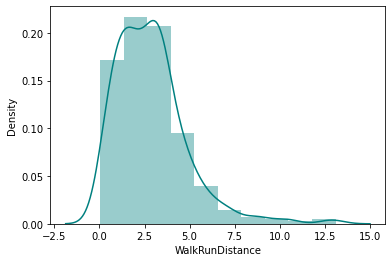

In [13]:
# Create a probability density function (area under the function is 1)

sns.distplot(dist, bins=num_bins, color = 'teal');

<AxesSubplot:title={'center':'Room Cleanliness'}, xlabel='RoomClean'>

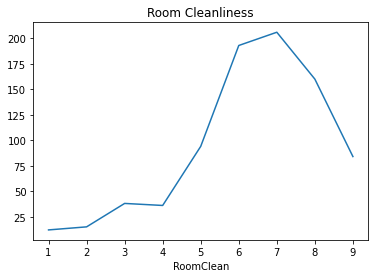

In [14]:
clean_dist = df.groupby('RoomClean').size()
clean_dist.plot(title='Room Cleanliness')

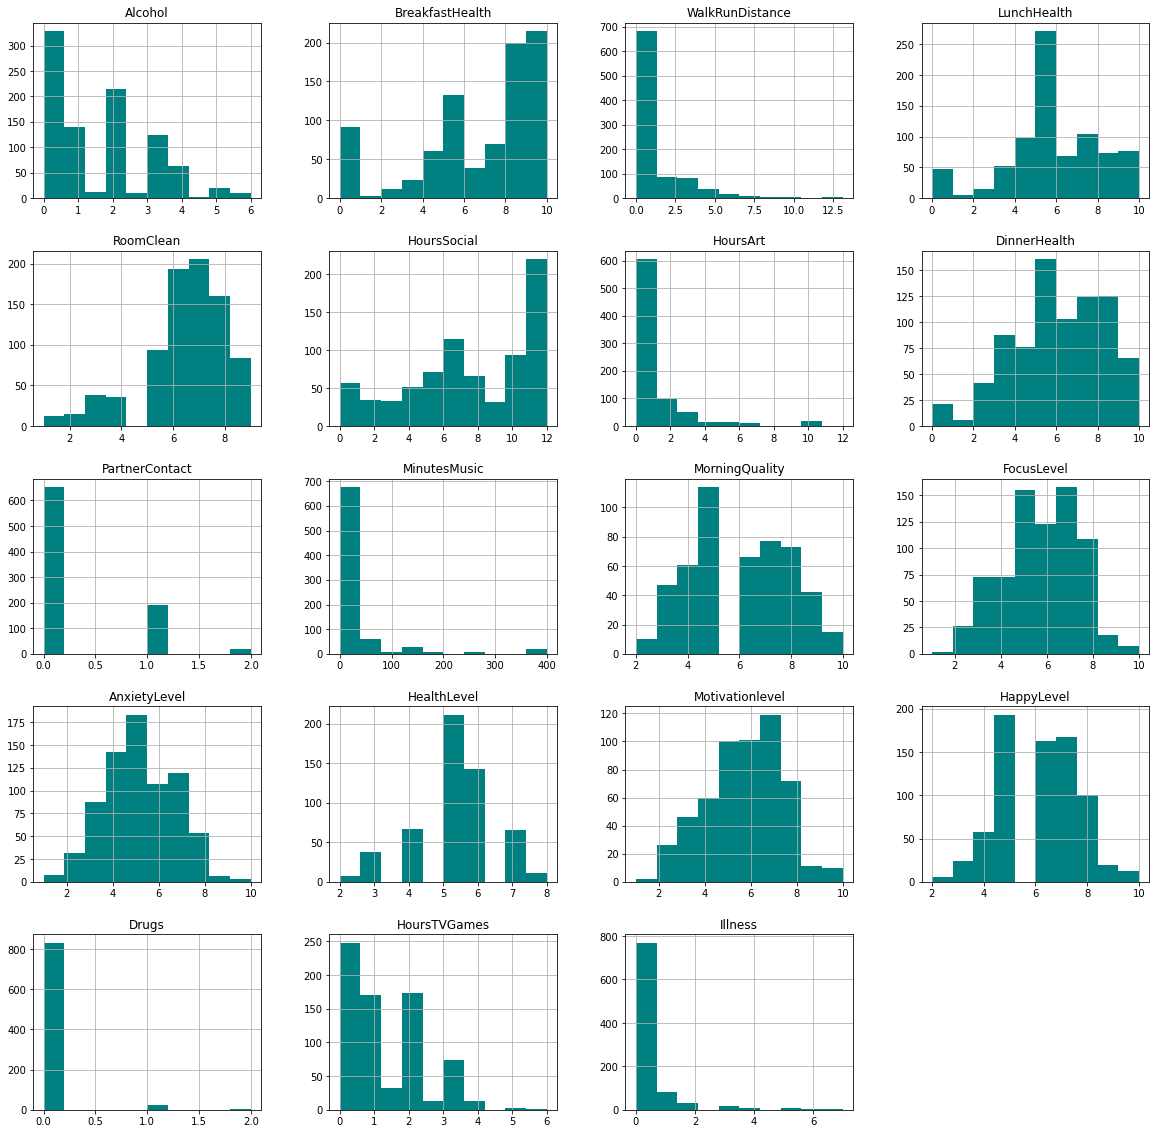

In [15]:
gray_numerical = df.select_dtypes(include = ['float64', 'int64'])
gray_numerical.hist(bins = num_bins, figsize=(20,20), color='teal');

In [16]:
gray_corr = gray_numerical.corr()
gray_corr

,Alcohol,BreakfastHealth,WalkRunDistance,LunchHealth,RoomClean,HoursSocial,HoursArt,DinnerHealth,PartnerContact,MinutesMusic,MorningQuality,FocusLevel,AnxietyLevel,HealthLevel,Motivationlevel,HappyLevel,Drugs,HoursTVGames,Illness
Alcohol,1.000000,0.050847,0.092779,0.027723,-0.124777,0.067396,0.056008,0.078502,0.132325,0.028976,-0.009272,0.036431,-0.045655,0.042371,0.051474,0.160082,-0.020234,-0.087039,-0.083270
BreakfastHealth,0.050847,1.000000,0.162080,-0.059792,0.117346,-0.206992,0.015166,0.083740,-0.015642,0.072779,0.278676,0.135104,-0.062541,0.132384,0.141049,0.125518,-0.010999,0.067975,-0.001505
WalkRunDistance,0.092779,0.162080,1.000000,-0.006158,0.011347,-0.244720,-0.118855,0.127814,-0.069307,-0.094227,0.173324,-0.072522,-0.139494,0.253054,0.015082,0.028678,-0.035103,0.083470,-0.174264
LunchHealth,0.027723,-0.059792,-0.006158,1.000000,-0.020744,0.138333,-0.005819,0.078415,0.066422,0.070189,-0.056896,0.094676,0.010785,0.128339,0.069753,0.053739,0.029086,-0.097515,-0.071927
RoomClean,-0.124777,0.117346,0.011347,-0.020744,1.000000,-0.144816,-0.092803,0.072660,0.064362,-0.008390,0.122686,0.015417,-0.066940,0.120638,-0.010383,0.098460,-0.050368,0.120312,-0.039194
HoursSocial,0.067396,-0.206992,-0.244720,0.138333,-0.144816,1.000000,0.144896,0.062832,0.278464,-0.052753,-0.185360,0.021474,0.058383,-0.195383,0.085082,0.055080,0.036043,-0.369786,0.113063
HoursArt,0.056008,0.015166,-0.118855,-0.005819,-0.092803,0.144896,1.000000,-0.057354,0.052694,-0.091585,0.005221,0.209544,-0.036002,-0.011798,0.322440,0.173574,0.103272,-0.184126,-0.045073
DinnerHealth,0.078502,0.083740,0.127814,0.078415,0.072660,0.062832,-0.057354,1.000000,0.140945,0.111131,-0.030039,0.023975,-0.018827,0.099848,0.100884,0.069759,0.011024,-0.024990,-0.040631
PartnerContact,0.132325,-0.015642,-0.069307,0.066422,0.064362,0.278464,0.052694,0.140945,1.000000,0.114327,0.024195,0.002248,-0.096504,0.092408,0.207522,0.237265,0.026889,-0.174814,-0.045688
MinutesMusic,0.028976,0.072779,-0.094227,0.070189,-0.008390,-0.052753,-0.091585,0.111131,0.114327,1.000000,0.145981,-0.004895,-0.107003,0.178608,0.202704,0.167568,0.006200,-0.033705,0.034319


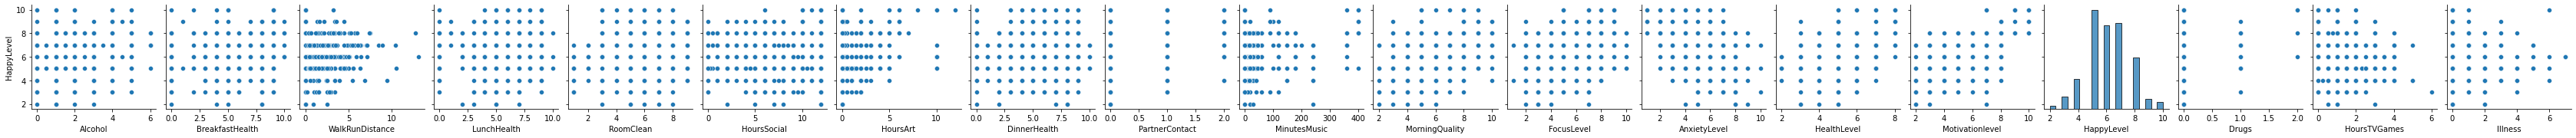

In [17]:
# What factors are likely to affect my happiness?

for i in range (0, len(gray_numerical.columns), 20):
    sns.pairplot(gray_numerical, y_vars=['HappyLevel'])

/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


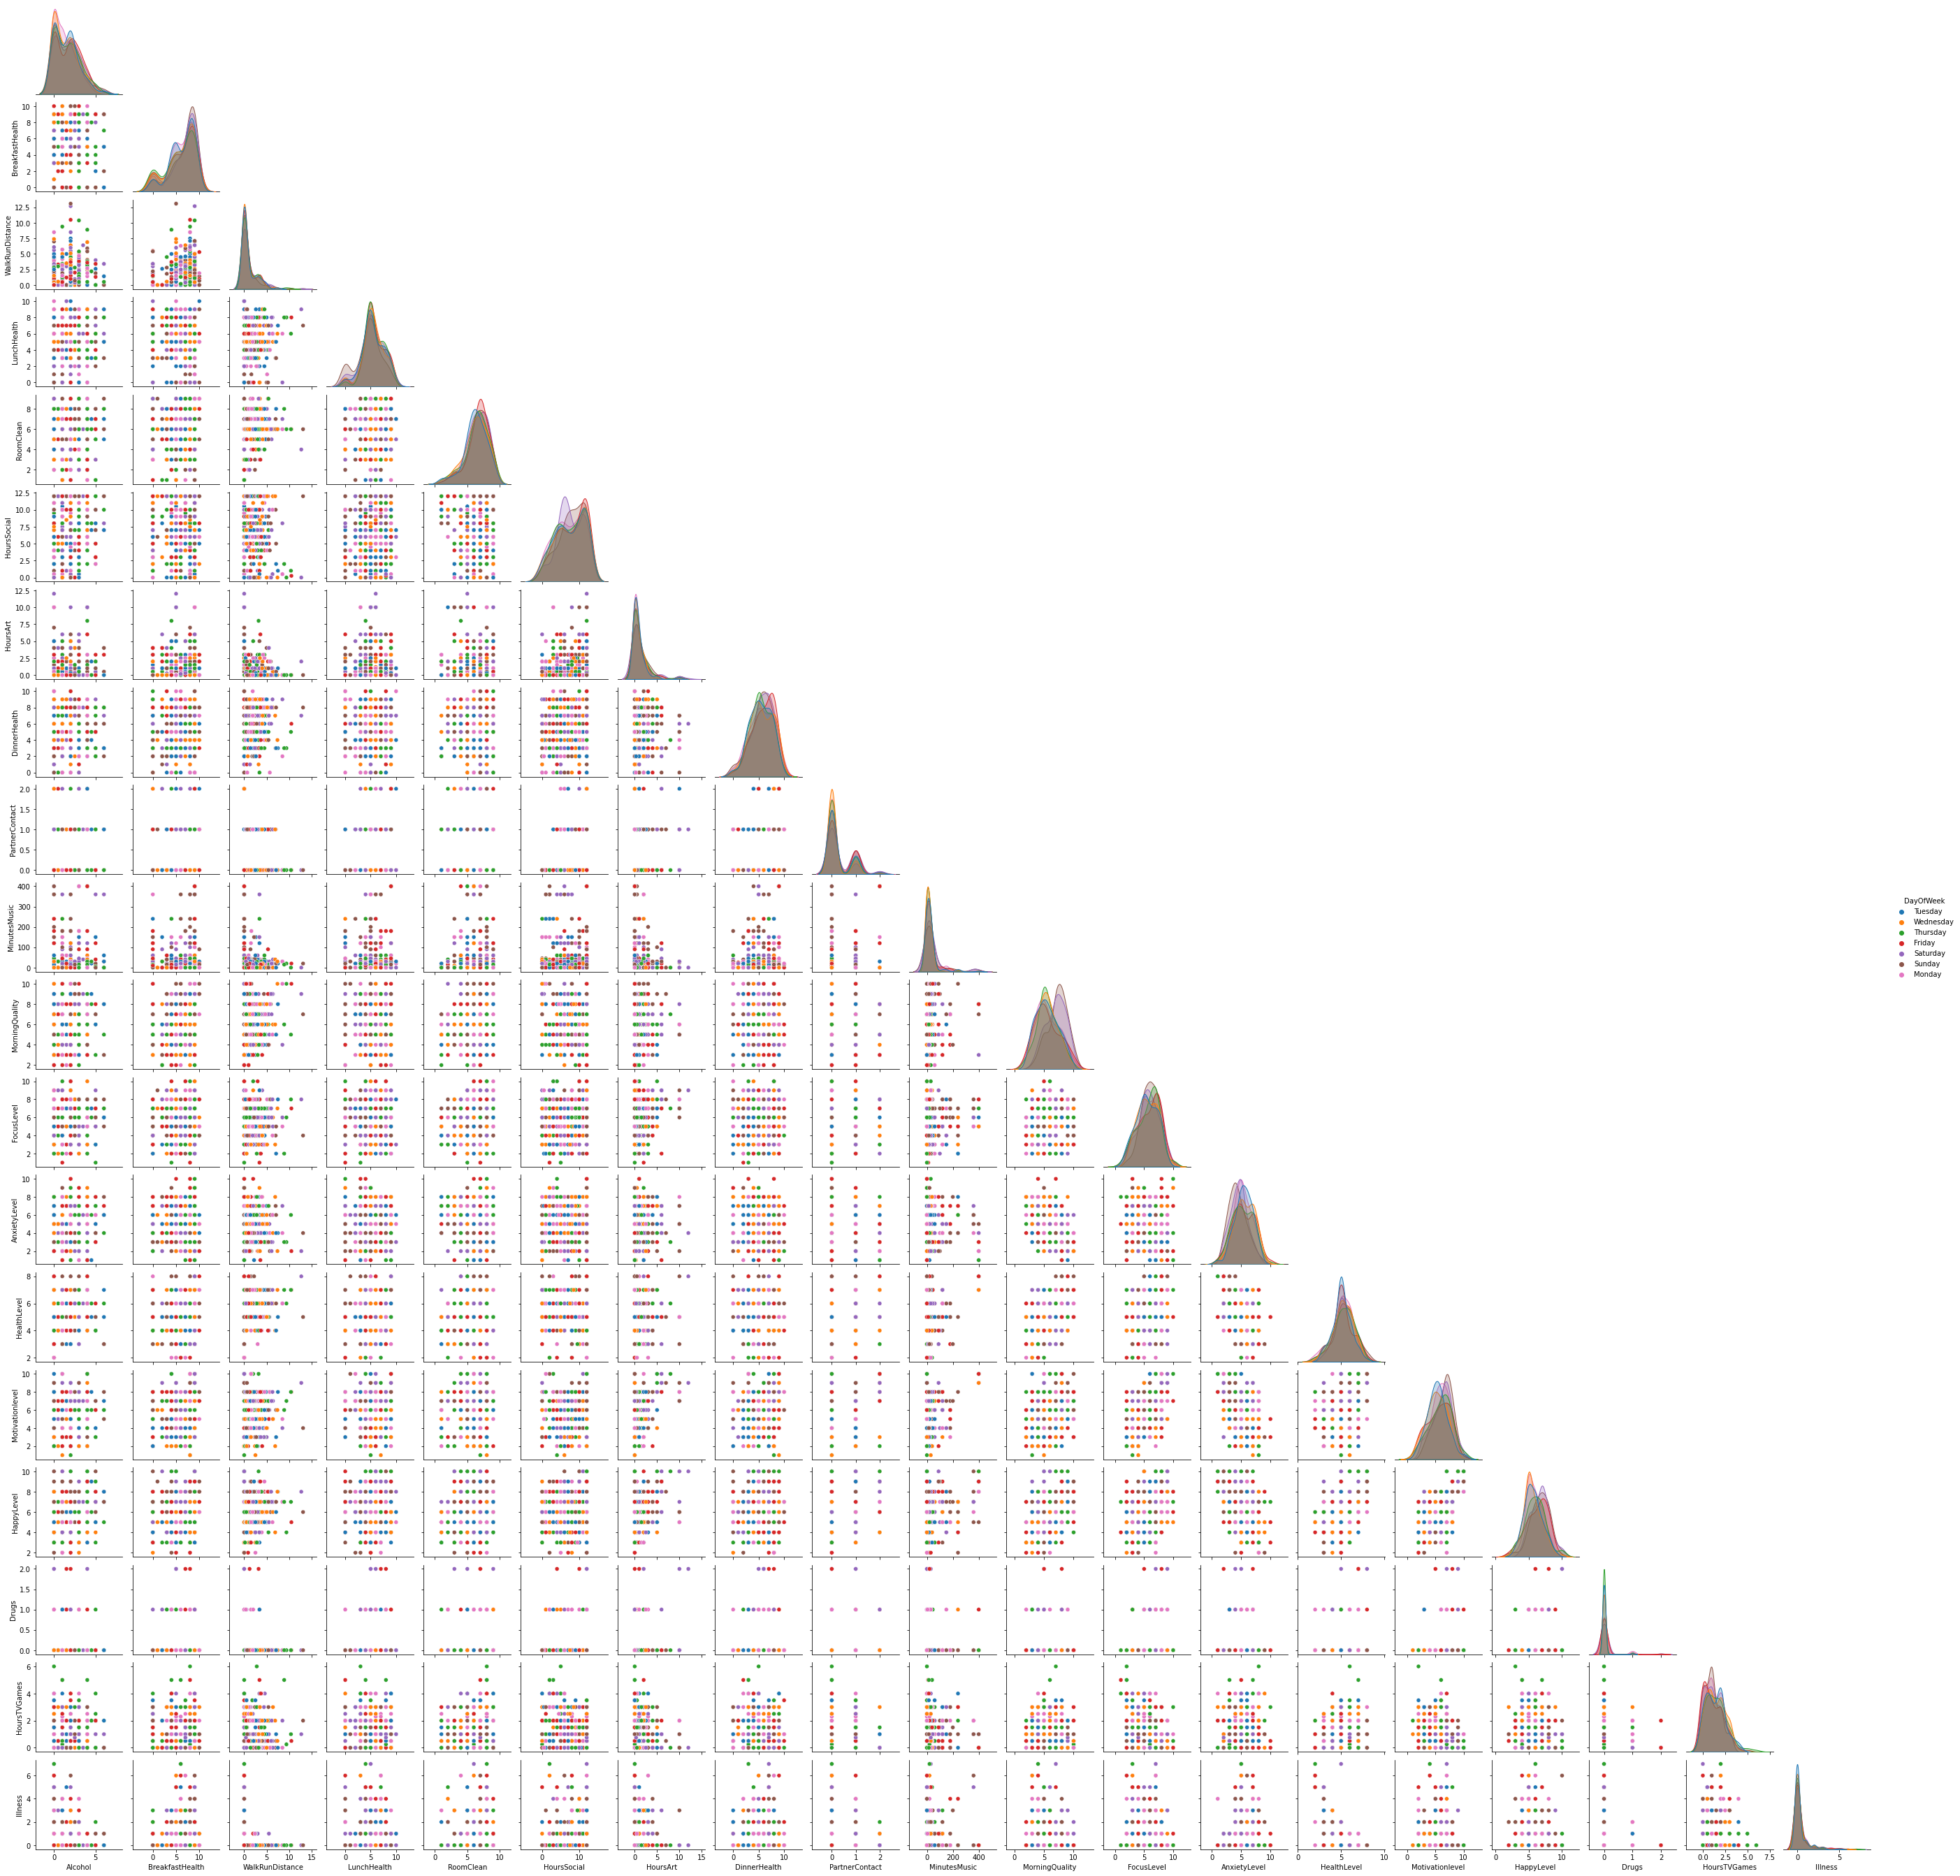

In [190]:
# What factors are affected by day of week?

sns.pairplot(df, hue="DayOfWeek", corner=True, height = 2)


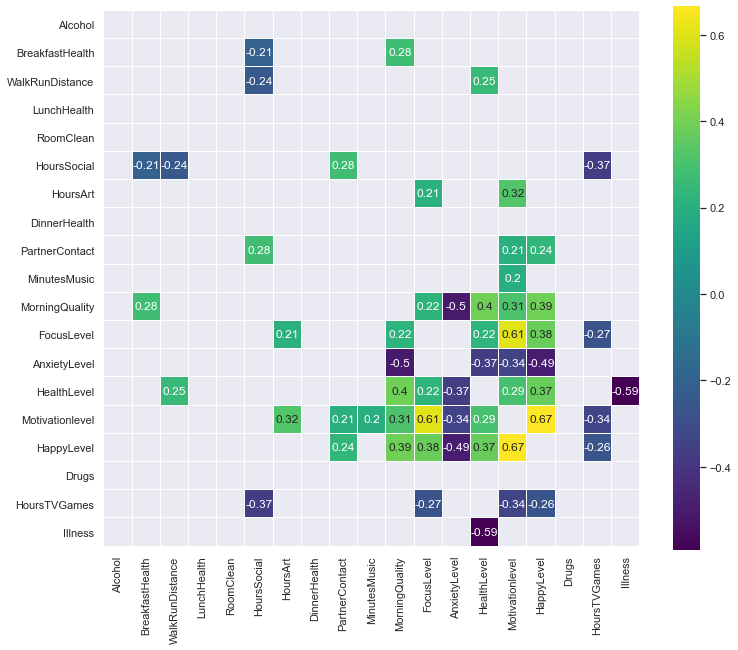

In [18]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(gray_corr[(gray_corr >= .2) & (gray_corr < .99) | (gray_corr <= -.2) ], cmap = 'viridis', square = True, annot = True, linewidths = .1);

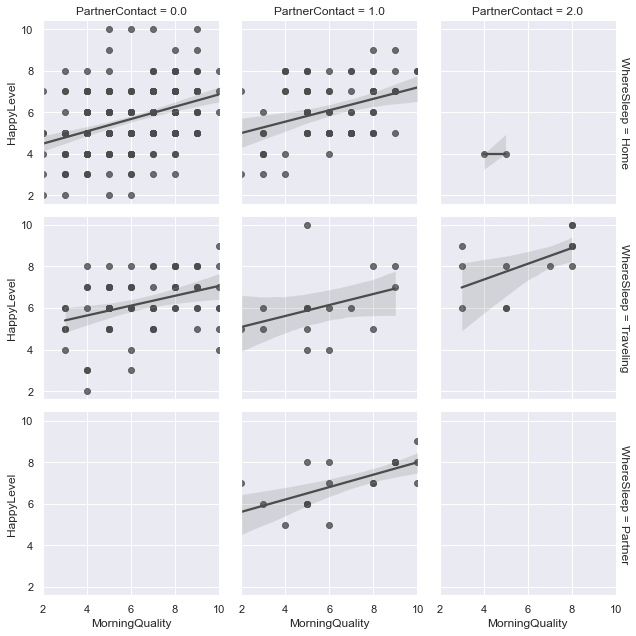

In [19]:
# I'll use a grid of Reg Plots to look at the Categorical Variables for where I slept and whether I slept with a partner

box1 = sns.FacetGrid(data = df, row='WhereSleep', col='PartnerContact', margin_titles=True)
box1.map(sns.regplot, 'MorningQuality', 'HappyLevel', color=".3");


/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


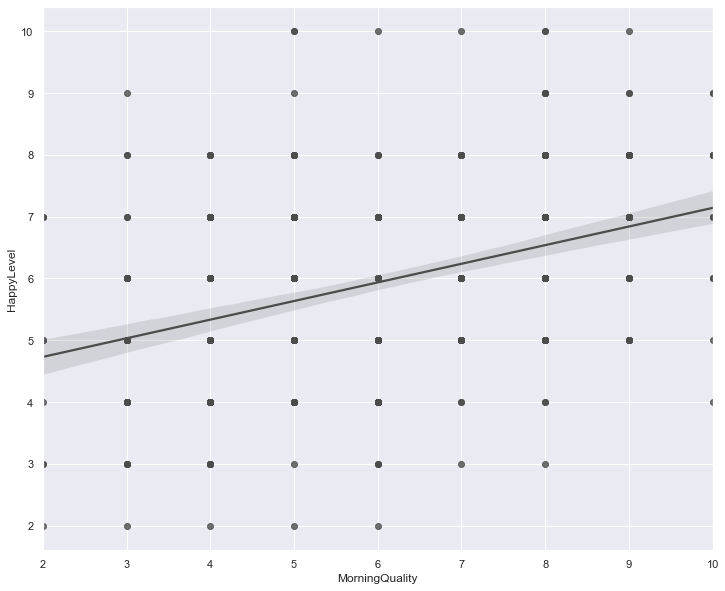

In [20]:
# Or all together, collapsed across the categorical variables: 

sns.regplot('MorningQuality', 'HappyLevel', data = df, color=".3");

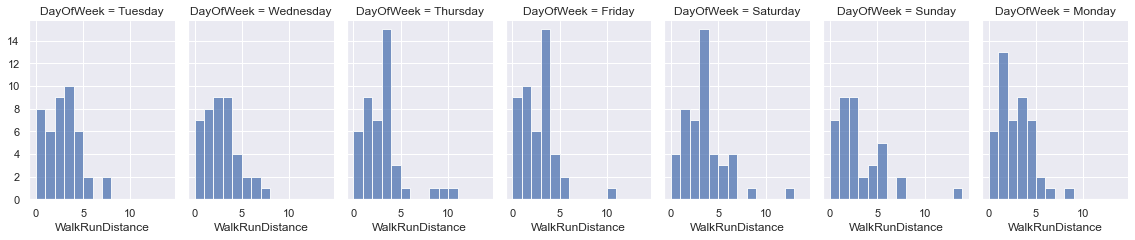

In [21]:
# Histogram of exercise distance based on day of week.  

df['WalkRunDistance'] = df['WalkRunDistance'].replace(0, np.nan)

g = sns.FacetGrid(data = df, col="DayOfWeek", height=3.5, aspect=.65)
g.map(sns.histplot, "WalkRunDistance", bins=range(0, 15, 1));

<ipython-input-22-19557148f227>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  box1.set_yticklabels(['16:45 PM','19:45 PM','22:12 PM','01:00 AM','03:45 AM','06:30 AM','09:30 AM','12:06 PM','02:50 PM'])


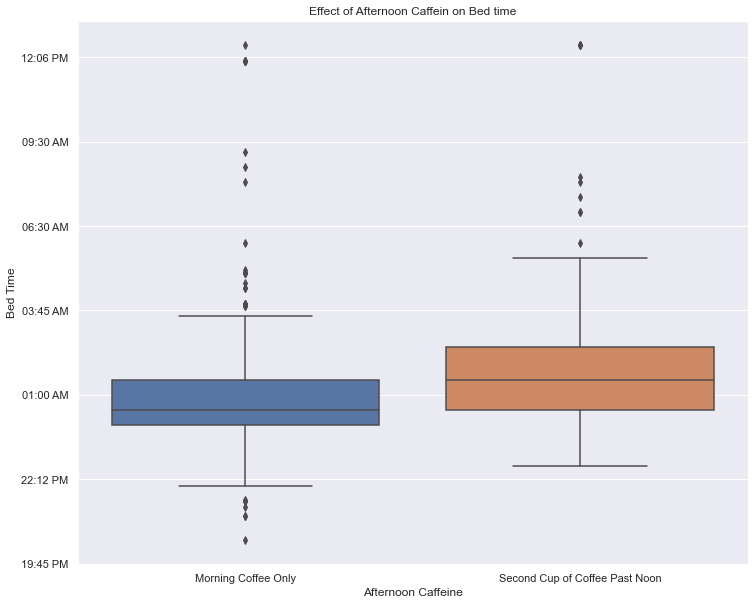

In [22]:
# How does PM Caffein affect a) bed-time  

def get_sec(time_str):
    """Get Seconds from time."""
    if time_str.count(':') == 1:
        h, m = time_str.split(':')
        return int(h) * 3600 + int(m) * 60
    elif time_str.count(':') == 2:
        h, m, s = time_str.split(':')
        return int(h) * 3600 + int(m) * 60 + int(s)
    else:
        return 0

time_df = df
time_df['SecondCoffeeTime'] = time_df['SecondCoffeeTime'].replace("0", np.nan)
time_df['CaffeinCategorical'] = np.where(time_df['SecondCoffeeTime'].isnull(), 0, 1)

time_df['SleepTime'] = time_df['SleepTime'].replace('24:00:00', '0:00:00')
sleep_time_list = list(df['SleepTime'])
sleep_time_list = [get_sec(str(itm)) for itm in sleep_time_list]
sleep_time_list = [itm + 86400 if itm < 57600 else itm for itm in sleep_time_list ]
time_df['SleepTime2'] = sleep_time_list

time_df['WakeTime'] = time_df['WakeTime'].replace('24:00:00', '0:00:00')
wake_time_list = list(df['WakeTime'])
wake_time_list = [get_sec(str(itm)) for itm in wake_time_list]
wake_time_list = [itm + 86400 if itm < 57600 else itm for itm in wake_time_list ]
time_df['WakeTime2'] = wake_time_list

box1 = sns.boxplot(x = time_df['CaffeinCategorical'], y = time_df['SleepTime2']) 
box1.set_xticklabels(['Morning Coffee Only','Second Cup of Coffee Past Noon'])
box1.set_yticklabels(['16:45 PM','19:45 PM','22:12 PM','01:00 AM','03:45 AM','06:30 AM','09:30 AM','12:06 PM','02:50 PM'])
box1.set(xlabel='Afternoon Caffeine', ylabel='Bed Time');
box1.set(title = 'Effect of Afternoon Caffein on Bed time');


In [24]:
#b) total-sleep?
# Check out the later-shift caused by attending Envision festival in February 2020!

fig = go.Figure(data=[go.Candlestick(
                x=time_df['Date'],
                open=time_df['SleepTime2'], 
                high=df['SleepTime2'],
                low=df['SleepTime2'], 
                close=time_df['WakeTime2'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [36]:
time_df['SleepTime2'][888]


86400

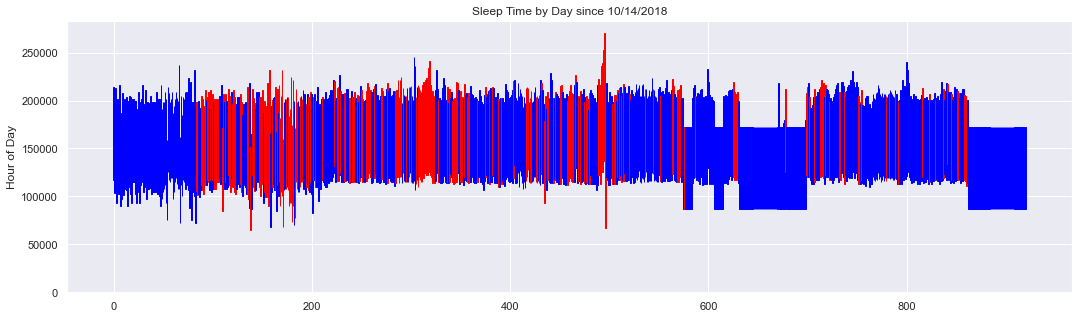

In [45]:

N = 921
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


cc=['white']*len(time_df['WakeTime2'])
al=[1.0]*len(time_df['WakeTime2'])

for n in range(921):
    if time_df['CaffeinCategorical'][n]==1:
        cc[n]='red'
    elif time_df['CaffeinCategorical'][n]==0:
        cc[n]='blue'
    if time_df['SleepTime2'][n] == 86400:
        al[n]=.001


        
p1 = plt.bar(ind, time_df['WakeTime2'], color='#d62728', alpha = 0)
p2 = plt.bar(ind, time_df['SleepTime2'], bottom=time_df['WakeTime2'], color=cc, edgecolor=cc, alpha = 1)



plt.ylabel('Hour of Day')
plt.title('Sleep Time by Day since 10/14/2018')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))
sns.set(rc={'figure.figsize':(18,5)})
plt.show()

# next we'd want to add further conditionals to, say, an alpha array that would change the opacity to 0 when I don't have data.  
# also fix the y-axis scale. 

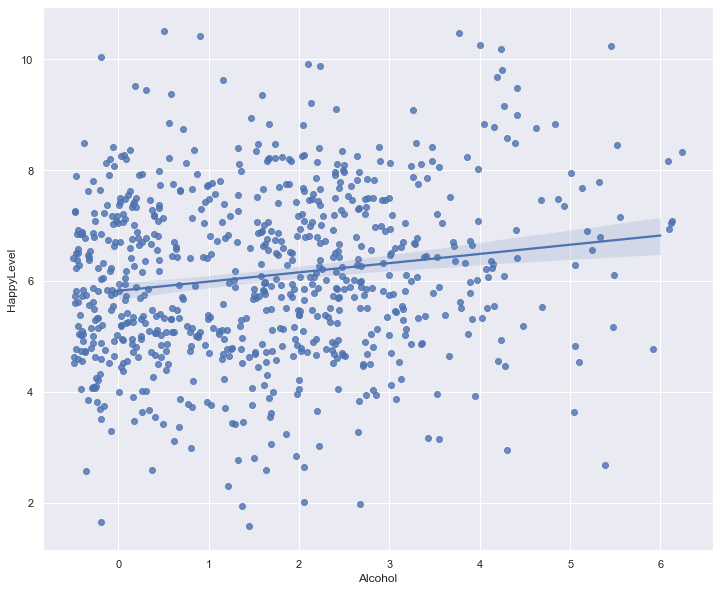

In [29]:
# Is there a causal relationship between alcohol consumption and happiness? 
# What about a few days later? 
ax = sns.regplot(x="Alcohol", y="HappyLevel", data=df, x_jitter=.5, y_jitter=.5)

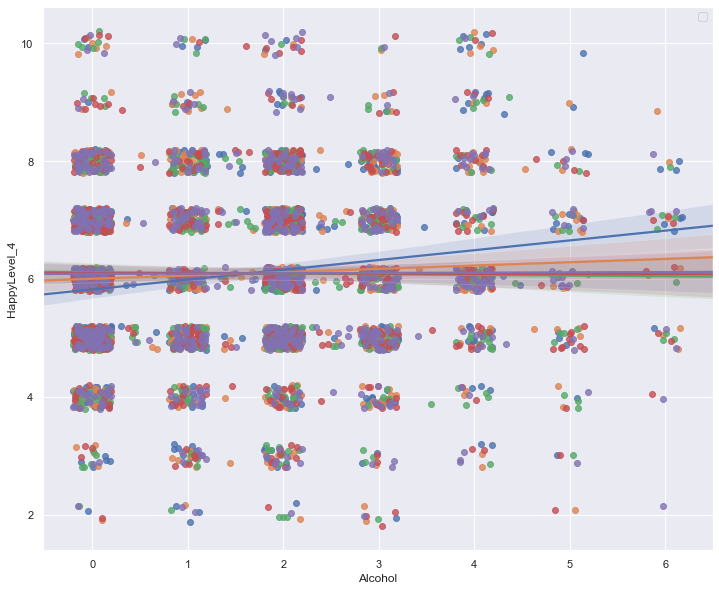

In [28]:
df['HappyLevel_1'] = np.roll(df['HappyLevel'], 1)
df['HappyLevel_2'] = np.roll(df['HappyLevel'], 2)
df['HappyLevel_3'] = np.roll(df['HappyLevel'], 3)
df['HappyLevel_4'] = np.roll(df['HappyLevel'], 4)

ax = plt.subplot(111)


ax.legend(labels=['First','Second','Third'])


sns.regplot(x='Alcohol', y='HappyLevel', data=df, truncate=False, ax=ax, x_jitter=.2, y_jitter=.2)
sns.regplot(x='Alcohol', y='HappyLevel_1', data=df, truncate=False, ax=ax, x_jitter=.2, y_jitter=.2)
sns.regplot(x='Alcohol', y='HappyLevel_2', data=df, truncate=False, ax=ax, x_jitter=.2, y_jitter=.2)
sns.regplot(x='Alcohol', y='HappyLevel_3', data=df, truncate=False, ax=ax, x_jitter=.2, y_jitter=.2)
sns.regplot(x='Alcohol', y='HappyLevel_4', data=df, truncate=False, ax=ax, x_jitter=.2, y_jitter=.2)

plt.show()




In [139]:
# How long do my illnesses usually last?  Graph them all on top of each other with low alpha.  

# Find each time the illness column jumps above 0
# cut out all of those times for 30 days afterward
# graph them all on top of each other with low alpha

#ax = plt.subplot(111)
#ax.legend(labels=['First','Second','Third'])
#counter = list(range(1,31))
df_ill_1 = pd.DataFrame(columns=[])
df_ill_2 = pd.DataFrame(columns=[])

for n in range(len(df['Illness'])-1):
    if (df['Illness'][n+1]>0) & (df['Illness'][n]==0):
        #print(df['Date'][n])
        sick_values = list(df['Illness'][n:n+30])
        ill_date = df['Date'][n+1]
        df_ill_1[ill_date] = sick_values
        
df_ill_1['index1'] = df_ill_1.index
df_ill_1.head(40)
        #sick_period = list(df['Date'][n:n+30])
#sns.regplot(y = sick_values, x = counter)
#sick_values
#plt.show()
      

,12/10/18,1/5/19,3/6/19,5/5/19,6/5/19,8/17/19,9/1/19,10/7/19,11/18/19,12/12/19,2/6/20,4/25/20,6/22/20,1/18/21,index1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,1.0,2.0,3.0,7.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1
2,1.0,0.0,2.0,0.0,0.0,2.0,6.0,1.0,2.0,5.0,5.0,2.0,0.0,0.0,2
3,2.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,3
4,3.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,4
5,4.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,3.0,4.0,4.0,0.0,0.0,0.0,5
6,5.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,6
7,6.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,3.0,0.0,0.0,0.0,7
8,4.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,8
9,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,9


/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/anaconda3/lib/python3

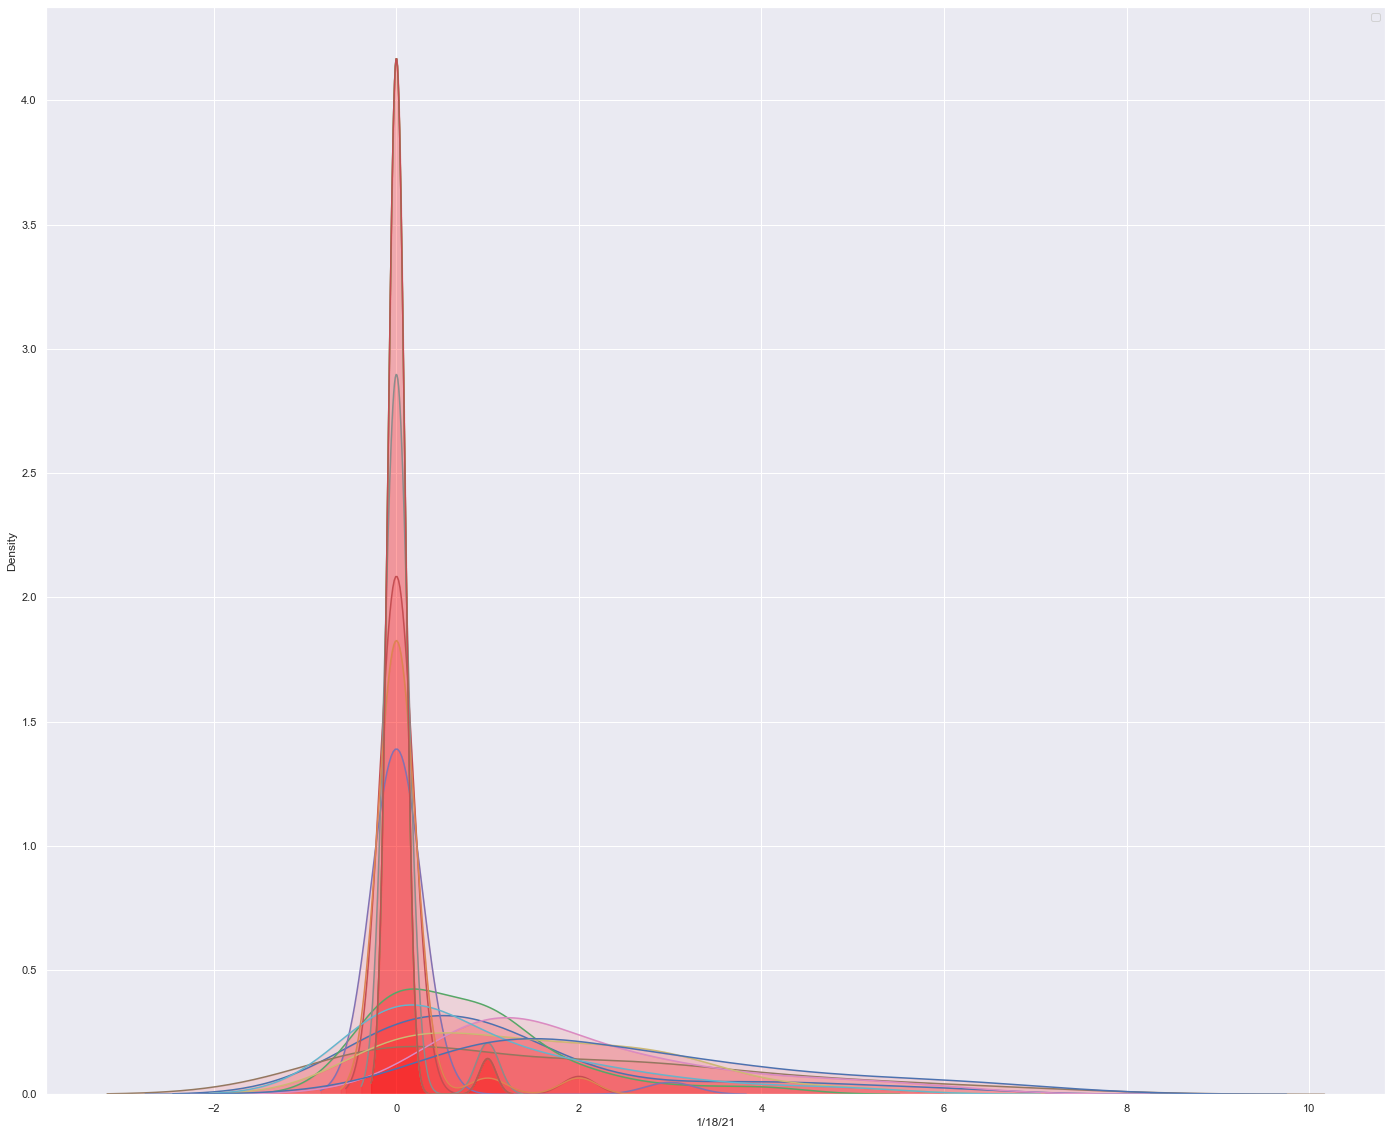

In [172]:
ax = plt.subplot(111)
ax.legend(labels=['First','Second','Third'])

date_columns = ['12/10/18', '1/5/19', '3/6/19', '5/5/19', '6/5/19', '8/17/19', '9/1/19',
       '10/7/19', '11/18/19', '12/12/19', '2/6/20', '4/25/20', '6/22/20',
       '1/18/21']

for date_col in date_columns:
    sns.distplot(df_ill_1[date_col], hist=None, fit_kws={"color":"red"})
sns.set(rc={'figure.figsize':(24,20)})


for n in range(len(ax.lines)):
# Get the xy data from the lines so that we can shade

    ax.fill_between(ax.lines[n].get_xydata()[:,0],ax.lines[n].get_xydata()[:,1], color="red", alpha=0.1)
plt.show()


In [4]:
# Use linear regression to predict daily happiness.  Find days that are outliers and see if there was anything particularly odd about those days. 
# Do the same for anxiety
# https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
random_state = 42
test_size = .2


In [15]:
del df
df = df_clean
df.columns

Index(['Date', 'DayOfWeek', 'Alcohol', 'BreakfastHealth', 'WalkRunDistance',
       'LunchHealth', 'RoomClean', 'HoursSocial', 'HoursArt', 'DinnerHealth',
       'SleepTime', 'WakeTime', 'HoursSleep', 'WhereSleep', 'PartnerContact',
       'MinutesMusic', 'MorningQuality', 'FocusLevel', 'AnxietyLevel',
       'HealthLevel', 'Motivationlevel', 'HappyLevel', 'Drugs', 'Weight',
       'HoursTVGames', 'FinishBook', 'Illness', 'WorkStartTime', 'WorkEndTime',
       'SecondCoffeeTime', 'CovidPoints'],
      dtype='object')

In [17]:
del df
df = df_clean


ids = [0, 1, 2]
countries = ['Sleep_Home', 'Sleep_Partner_House', 'Sleep_Traveling']

df_sleep = pd.get_dummies(df.WhereSleep, prefix='WhereSleep')
df_sleep.sample(40)

,WhereSleep_Home,WhereSleep_Partner,WhereSleep_Traveling
836,0,0,1
33,1,0,0
276,1,0,0
428,1,0,0
725,0,0,1
104,1,0,0
641,0,0,1
106,1,0,0
383,1,0,0
668,0,0,1


In [14]:
# Test/Train Split

# Make sure our dataframe is clean after all that EDA
del df
df = df_clean


ids = [0, 1, 2]
countries = ['Sleep_Home', 'Sleep_Partner_House', 'Sleep_Traveling']

df_sleep = pd.get_dummies(df.WhereSleep, prefix='WhereSleep')
df_sleep.sample()


dataframe = pd.concat([dataframe, df2], axis=1)

    

df = df.drop(['Date', 'DayOfWeek','SleepTime', 'WakeTime', 'HoursSleep', 'WhereSleep', 'PartnerContact', 'Drugs', 
       'FinishBook','WorkStartTime', 'WorkEndTime',
       'SecondCoffeeTime'], axis=1)

# the target variables will be first happiness (HappyLevel) and then anxiety (AnxietyLevel)
X, y = df.drop(['HappyLevel'], axis=1), df['HappyLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

In [6]:
# Fill NaN values with the column mean for each of the test and train sets


# Fill the NaNs in some of the numeric columns with the column average
avg_columns = ['Alcohol', 'WalkRunDistance', 'HoursSocial', 'HoursArt', 'MinutesMusic', 'Weight', 
        'HoursTVGames', 'BreakfastHealth', 'LunchHealth', 'RoomClean', 'DinnerHealth', 'MorningQuality', 
        'FocusLevel', 'AnxietyLevel', 'HealthLevel', 'Motivationlevel']

for column in avg_columns:
    X_train[column].replace(r'^\s*$', np.nan, regex=True, inplace=True)
    col_mean = X_train[column].median()
    X_train[column].fillna(col_mean, inplace=True)
    
    X_test[column].replace(r'^\s*$', np.nan, regex=True, inplace=True)
    col_mean = X_test[column].median()
    X_test[column].fillna(col_mean, inplace=True)
    
y_train_col_mean = y.median()
y_train.fillna(y_train_col_mean, inplace=True)

y_test_col_mean = y.median()
y_test.fillna(y_test_col_mean, inplace=True)




/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [9]:
# Training the model

lreg = LinearRegression();
lreg.fit(X_train,y_train);

In [12]:
pred = lreg.predict(X_test)
mse = np.mean((pred - y_test)**2)
mse

0.9435363035437048

In [11]:

# Calculating the coefficients

coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,Alcohol,0.120957
1,BreakfastHealth,0.006884
2,WalkRunDistance,-0.012445
3,LunchHealth,0.001213
4,RoomClean,0.075502
5,HoursSocial,0.011134
6,HoursArt,0.031033
7,DinnerHealth,-0.001564
8,MinutesMusic,0.001851
9,MorningQuality,0.031970


Text(0, 0.5, '# of Drinks')

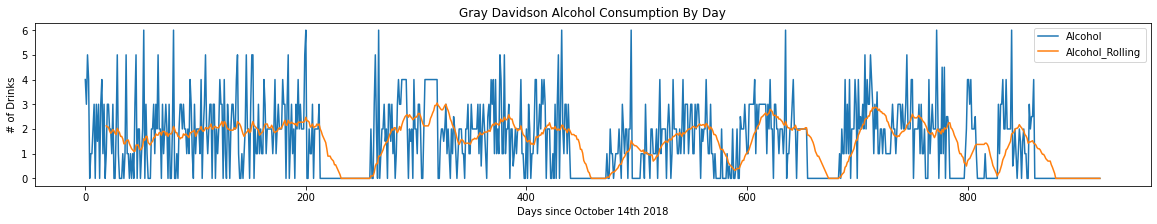

In [108]:
df['Alcohol_Rolling'] = df.iloc[:,6].rolling(window=20).mean()

drink_plot = df.plot(y=['Alcohol', 'Alcohol_Rolling'],  use_index=True, figsize=(20,3), title='Gray Davidson Alcohol Consumption By Day');

drink_plot.set_xlabel("Days since October 14th 2018")
drink_plot.set_ylabel("# of Drinks")

Text(0, 0.5, 'Distance (Miles)')

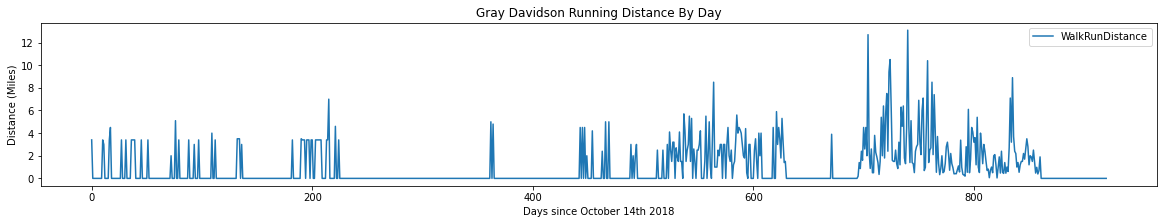

In [130]:
run_plot = df.plot(y='WalkRunDistance',  use_index=True, figsize=(20,3), title='Gray Davidson Running Distance By Day');

run_plot.set_xlabel("Days since October 14th 2018")
run_plot.set_ylabel("Distance (Miles)")

Text(0, 0.5, 'Illness Self-Rating (0 thru 10)')

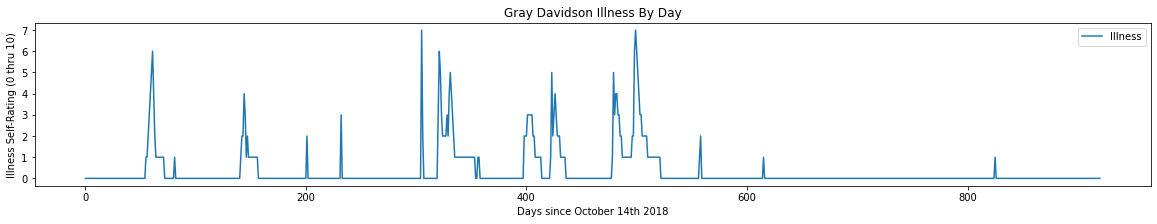

In [92]:
sick_plot = df.plot(y='Illness',  use_index=True, figsize=(20,3), title='Gray Davidson Illness By Day');

sick_plot.set_xlabel("Days since October 14th 2018")
sick_plot.set_ylabel("Illness Self-Rating (0 thru 10)")


In [129]:
three_plot = df.plot(y=['Alcohol_Rolling', 'Illness'],  use_index=True, figsize=(20,3), title='Gray Davidson Illness By Day');

three_plot.set_xlabel("Days since October 14th 2018")
three_plot.set_ylabel("Illness Self-Rating (0 thru 10)")

KeyError: "['Alcohol_Rolling'] not in index"